It's good practise to collect all import statements at the beginning. Since sklearn is such a large library, we only import what we'll need.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

plt.rcParams["figure.figsize"] = (10,6)

# California DataSet -  Regression

1. Linear Regression and Running Predictions on Train, Validation and Test Sets
2. Train Test Split

In [ ]:
from sklearn.datasets import fetch_california_housing

california_data = fetch_california_housing()

In [ ]:
type(california_data)

sklearn.utils._bunch.Bunch

In [ ]:
print(california_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
california_dataset = pd.DataFrame(california_data.data, columns=california_data.feature_names)

In [ ]:
california_dataset["MEDV"] = california_data.target

In [ ]:
california_dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
X = california_dataset.drop(['MEDV'], axis=1)
y = california_dataset["MEDV"]
X.shape, y.shape

((20640, 8), (20640,))

In [ ]:
#Alternatively

#X = california_data.data  # Features
#y = california_data.target  # Target (median house value)


##Train Test Split
The algorithms in Sklearn need as input the feature columns separately from the target column. The features are usually stored in a variable X (upper case), the target column in a variable y (lower case).

Additionally, to build good models that don't over- or underfit, we split the whole dataset into two parts: we randomly pick 20-30% of the rows: these are called the test set, the rest is called the training set.

So in the end, we have 4 parts: X_test, y_test, X_train and y_train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#everytime you run it without specifying random_state, you will get a different result, this is expected behavior. For example:


In [ ]:
#from pandas.core.common import random_state


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((13209, 8), (3303, 8), (4128, 8), (13209,), (3303,), (4128,))

In [ ]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16490,4.7069,27.0,6.523256,1.116279,873.0,3.383721,38.00,-120.97
6090,3.8750,15.0,5.058406,1.075770,3359.0,2.651144,34.10,-117.87
10973,2.8828,26.0,5.290618,1.201373,1273.0,2.913043,33.76,-117.85
17287,5.0000,34.0,6.474708,1.136187,705.0,2.743191,34.35,-119.74
12615,5.0371,25.0,6.385656,1.008119,1857.0,2.512855,38.50,-121.51
...,...,...,...,...,...,...,...,...
5606,3.3427,16.0,3.748996,1.146586,951.0,1.909639,33.79,-118.29
16339,3.6083,16.0,5.720486,0.980903,2279.0,3.956597,38.04,-121.34
14965,3.9844,18.0,5.549834,1.014950,1952.0,3.242525,32.74,-116.99
11117,4.5112,16.0,4.414286,1.011429,730.0,2.085714,33.84,-117.87


## First Model Training - Linear Regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
#Alternative:
#X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train_scaled,y_train)



SVR()

In [ ]:
lin_model.coef_

array([ 6.54941109,  0.49019953, -7.6676938 , 11.67429509, -0.26197761,
       -2.37863752, -3.91426622, -4.31060828])

In [ ]:
y_val_predict = lin_model.predict(X_val_scaled)


In [ ]:
y_val_predict

array([1.46393145, 1.03517034, 2.3408605 , ..., 2.08429766, 1.97220833,
       1.93469721])

In [ ]:
y_val

2071     0.96700
2612     0.75500
10838    4.30900
4061     3.32600
10767    5.00001
          ...   
18945    1.44000
6011     1.08000
10502    3.05600
14688    1.84500
11239    2.09400
Name: MEDV, Length: 3303, dtype: float64

In [ ]:
# Evaluation on Validation Set for LinearRegression Model
rmse_val = (np.sqrt(mean_squared_error(y_val, y_val_predict)))
mae_val = mean_absolute_error(y_val, y_val_predict)

r2_val = r2_score(y_val, y_val_predict)
rmse_val, r2_val, mae_val

(0.7338977899061454, 0.6097023914123487, 0.5407140746076856)

In [ ]:
#you can also run predictions on yout train data set
#usually your results will be  better than on the validation and test sets
#if they are really a lot better: you likely overfitted the model!
y_train_predict = lin_model.predict(X_train_scaled)

rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)
mae = mean_absolute_error(y_train, y_train_predict)
rmse_train, r2_train, mae

(0.7161740955543281, 0.6131488911003316, 0.5257496309491813)

In [ ]:
y_test_predict = lin_model.predict(X_test)

rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)
rmse_test, r2_test

(0.7446291348810524, 0.5768706123655902)

In [ ]:
#testing a different model SVR and comparing the validation metrics
sv_model = SVR()
sv_model.fit(X_train_scaled,y_train)

SVR()

In [ ]:
#Values from Linear Regression on Validation Set
rmse_val, r2_val, mae_val

(0.7338977899061454, 0.6097023914123487, 0.5407140746076856)

In [ ]:
#Performance Values from Support Regression on Validation Set
y_val_predict_sv = sv_model.predict(X_val_scaled)

rmse_val_sv = (np.sqrt(mean_squared_error(y_val, y_val_predict_sv)))
r2_val_sv = r2_score(y_val, y_val_predict_sv)
mae_val_sv = mean_absolute_error(y_val, y_val_predict_sv)

rmse_val_sv, r2_val_sv, mae_val_sv

(0.6758075576183126, 0.6690435731727911, 0.4559332002145667)

In [ ]:
y_test_predict_sv = sv_model.predict(X_test_scaled)

rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict_sv)))
r2_test = r2_score(y_test, y_test_predict_sv)
mae_test_sv = mean_absolute_error(y_test, y_test_predict_sv)

rmse_test, r2_test, mae_test_sv

(0.6797279112499064, 0.6474153939692993, 0.45288657903954715)

# Titanic DataSet - Classification
https://www.kaggle.com/competitions/titanic/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
titanic_data = pd.read_csv("/content/drive/MyDrive/titanic_train.csv")
titanic_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


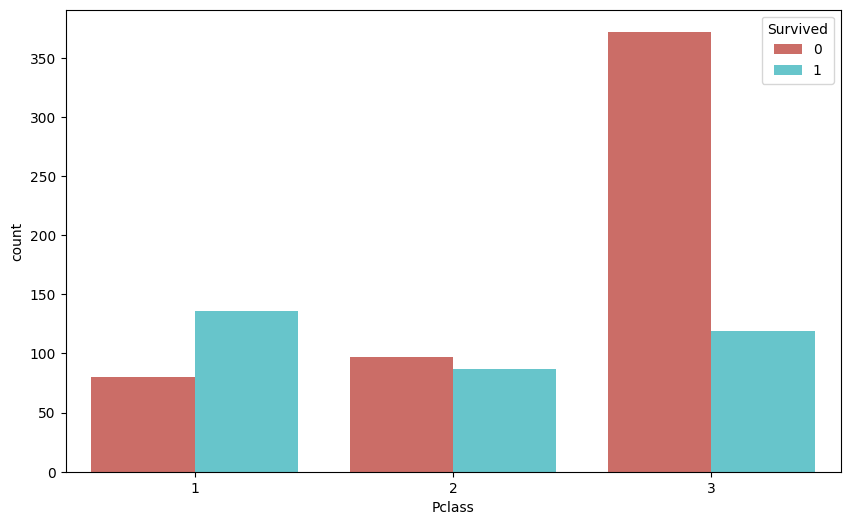

In [ ]:
sns.countplot(x='Pclass', data=titanic_data, palette='hls', hue='Survived')
#plt.xticks(rotation=45)
plt.show()

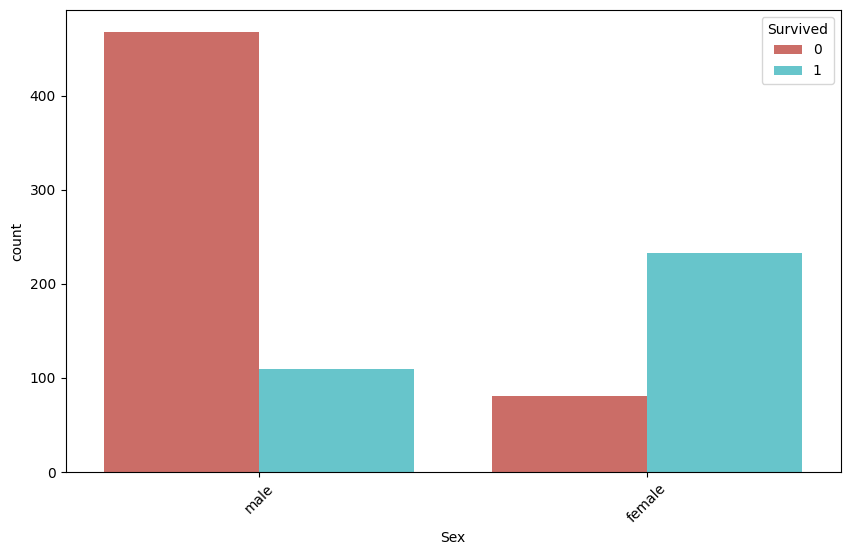

In [ ]:
sns.countplot(x='Sex', data=titanic_data, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

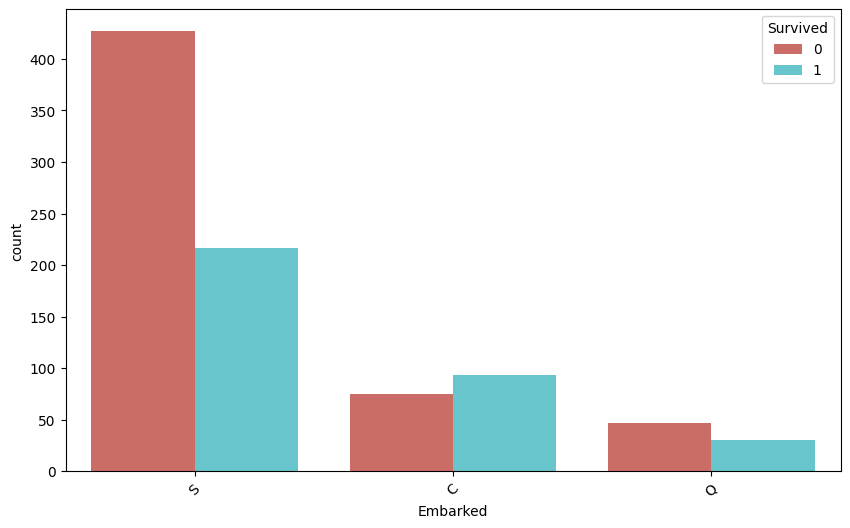

In [ ]:
sns.countplot(x='Embarked', data=titanic_data, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

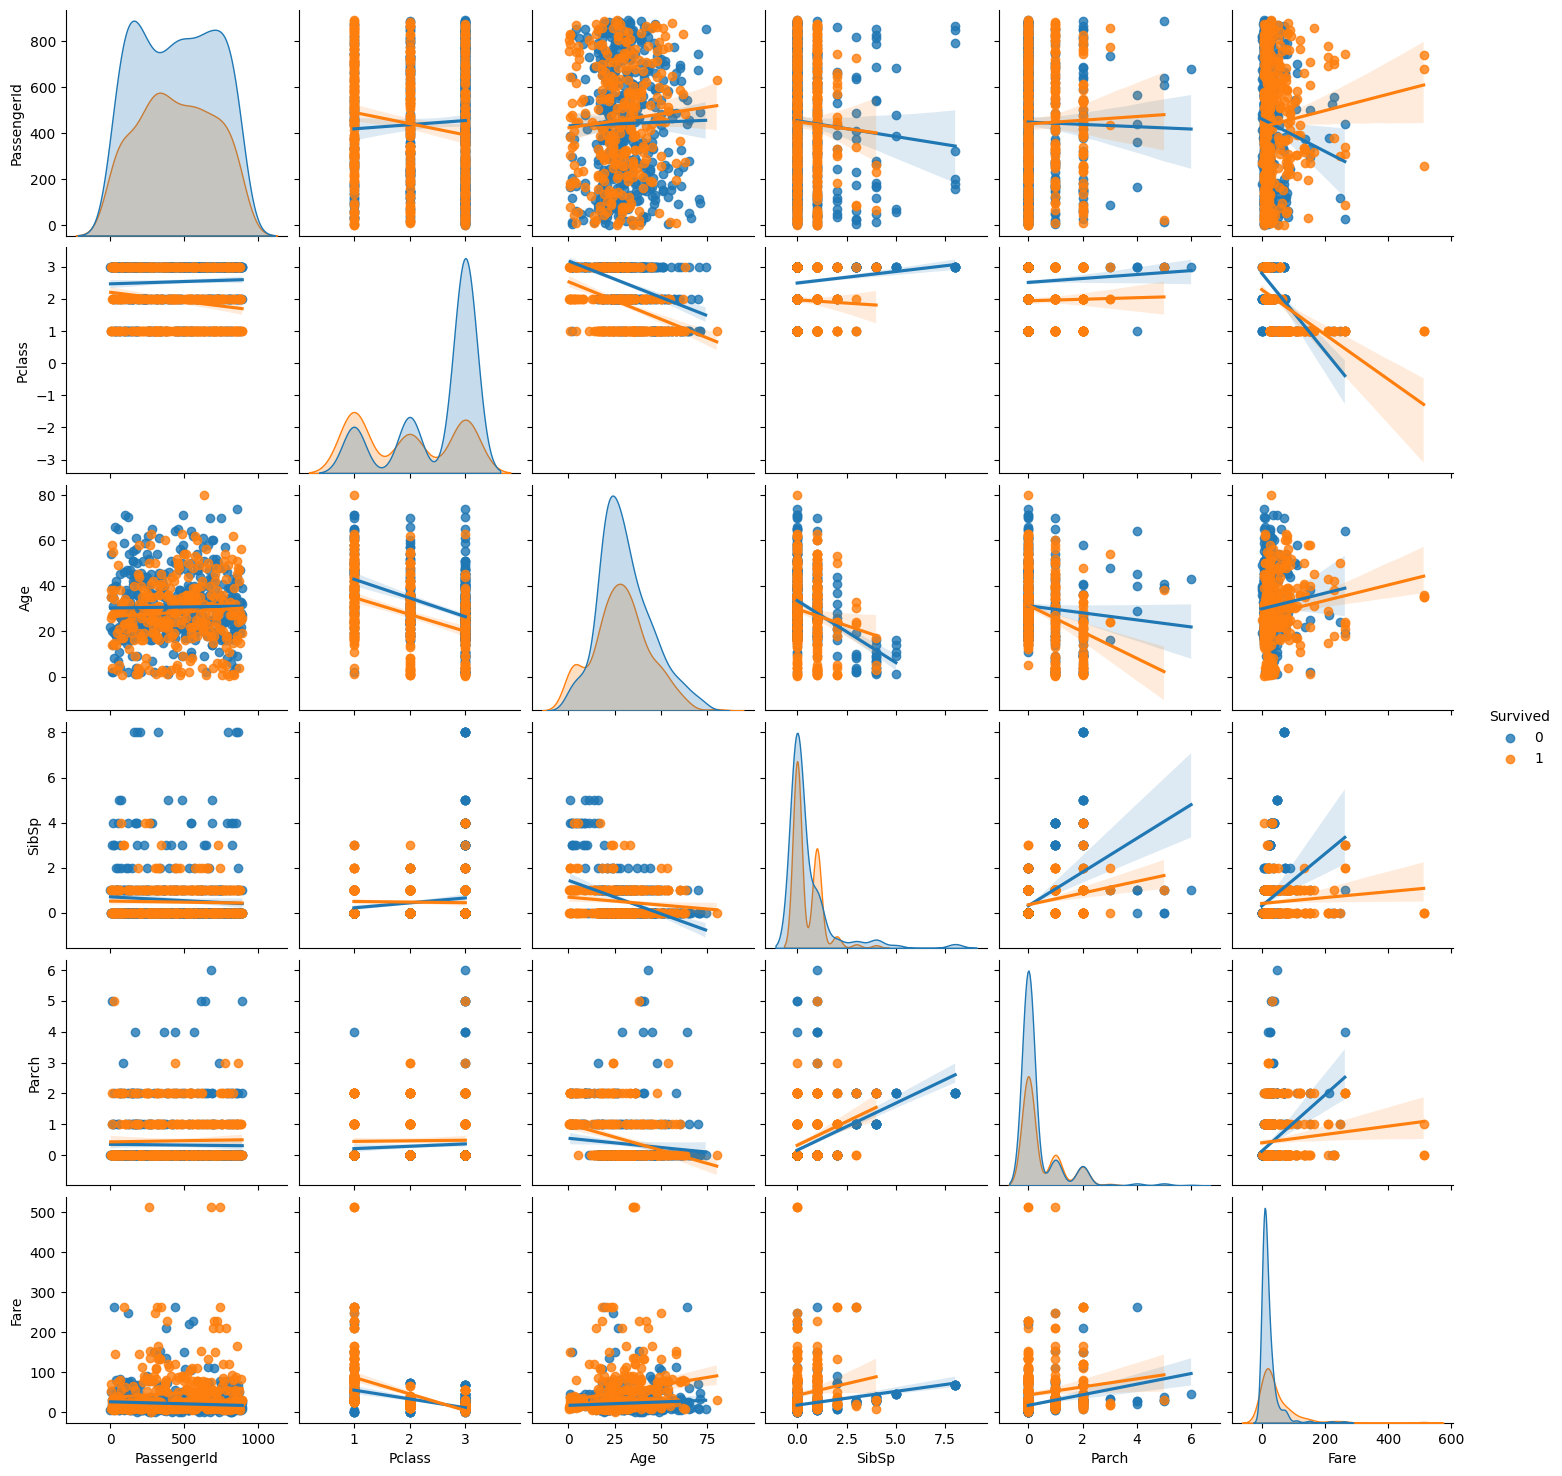

In [ ]:
sns.pairplot(titanic_data, hue="Survived", kind="reg")

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_data["Age"].fillna(titanic_data["Age"].median(), inplace=True)
titanic_data["Embarked"].fillna("U", inplace=True)

drop the variables we won't be using

'Cabin', 'Name', 'Ticket', 'PassengerId'

In [ ]:
titanic_columns = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex", "Embarked"]
X = titanic_data[titanic_columns]
y = titanic_data["Survived"]

Encode Categorical Variables
We need to convert all categorical variables into numeric format. The categorical variables we will be keeping are Embarked, Sex and Title.


In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,male,S
1,1,38.0,1,0,71.2833,female,C
2,3,26.0,0,0,7.9250,female,S
3,1,35.0,1,0,53.1000,female,S
4,3,35.0,0,0,8.0500,male,S


2 Ways to encode Categorical variables:

For Ordinal Variables, with implicit order:
1. Ordinal Encoding/Integer Encoding: Where each unique label is mapped to an integer.

For Nominal Variables, without implict order
2. One Hot Encoding: Where each label is mapped to a binary vector.
https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/



In this case 'Sex' and 'Embarked' are Nominal variables and should not be encoded as ordinal variables with Integer Encoding!!!

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,male,S
1,1,38.0,1,0,71.2833,female,C
2,3,26.0,0,0,7.9250,female,S
3,1,35.0,1,0,53.1000,female,S
4,3,35.0,0,0,8.0500,male,S


In [ ]:
#JUST FOR SHOWING THE ORDINAL ENCODER; BUT IN THIS CASE IT WOULD NOT BE GOOD BECAUE THOSE ARE NOMINAL VARIABLES!!!

#Label Encoder and OrdinalEncoder do the same thing but the difference is that OrdinalEncoder is used to convert the features, while LabelEncoder for the target variable.
#OrdinalEncoder in fact can fit multiple columns at the same time while LabelEncoder can only fit a vector of samples, but no one prevents you from preprocessing the columns one at a time with the second one.
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit_transform(X[["Sex",'Embarked']])



array([[1., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [1., 0.],
       [1., 1.]])

In [ ]:
df_encode = pd.DataFrame(encoder.fit_transform(X[["Sex",'Embarked']]),  columns = ["Sex",'Embarked'])

In [ ]:
df_encode

,Sex,Embarked
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0
...,...,...
886,1.0,2.0
887,0.0,2.0
888,0.0,2.0
889,1.0,0.0


In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,male,S
1,1,38.0,1,0,71.2833,female,C
2,3,26.0,0,0,7.9250,female,S
3,1,35.0,1,0,53.1000,female,S
4,3,35.0,0,0,8.0500,male,S


In [ ]:
X.drop('Embarked', axis =1 ,inplace=True)
X.drop('Sex', axis =1 ,inplace=True)
X = X.join(df_encode)



<ipython-input-18-0979bf8fddee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Embarked', axis =1 ,inplace=True)
<ipython-input-18-0979bf8fddee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Sex', axis =1 ,inplace=True)


In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,1.0,2.0
1,1,38.0,1,0,71.2833,0.0,0.0
2,3,26.0,0,0,7.9250,0.0,2.0
3,1,35.0,1,0,53.1000,0.0,2.0
4,3,35.0,0,0,8.0500,1.0,2.0


In [ ]:
#ALternatively on Original X dataframe before changing Sex and EMbarked :
#from sklearn.preprocessing import OrdinalEncoder
#encoder = OrdinalEncoder()
#X["Sex"] = encoder.fit_transform(X[["Sex"]])
#X["Embarked"] = encoder.fit_transform(X[["Embarked"]])



In [ ]:
titanic_columns = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex", "Embarked"]
X = titanic_data[titanic_columns]
y = titanic_data["Survived"]

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,male,S
1,1,38.0,1,0,71.2833,female,C
2,3,26.0,0,0,7.9250,female,S
3,1,35.0,1,0,53.1000,female,S
4,3,35.0,0,0,8.0500,male,S


In [ ]:
#One Hot encoding
#Option 1:
one_hot = pd.get_dummies(X['Embarked'])
one_hot

,C,Q,S,U
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
886,0,0,1,0
887,0,0,1,0
888,0,0,1,0
889,1,0,0,0


In [ ]:
X = X.merge(one_hot, left_index=True,right_index=True,how='inner')
X.drop('Embarked', axis =1 ,inplace=True)
X

,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S,U
0,3,22.0,1,0,7.2500,male,0,0,1,0
1,1,38.0,1,0,71.2833,female,1,0,0,0
2,3,26.0,0,0,7.9250,female,0,0,1,0
3,1,35.0,1,0,53.1000,female,0,0,1,0
4,3,35.0,0,0,8.0500,male,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,male,0,0,1,0
887,1,19.0,0,0,30.0000,female,0,0,1,0
888,3,28.0,1,2,23.4500,female,0,0,1,0
889,1,26.0,0,0,30.0000,male,1,0,0,0


In [ ]:
X["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [ ]:
#Alternative to pd.get_dummies for OneHot Encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()


enc.fit_transform(X[["Sex"]]).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
Sex_enc = enc.fit_transform(X[["Sex"]]).toarray()
Sex_enc.shape[1]

2

In [ ]:
df_enc = pd.DataFrame(enc.fit_transform(X[["Sex"]]).toarray(), columns = ["Sex_"+str(int(i)) for i in range(Sex_enc.shape[1])])
#enc.fit_transform(X[["Sex"]]).toarray()

In [ ]:
df_enc

,Sex_0,Sex_1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [ ]:
X = X.join( df_enc)
#droping the Sex column
X= X.drop(['Sex'], axis=1)

In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,U,Sex_0,Sex_1
0,3,22.0,1,0,7.2500,0,0,1,0,0.0,1.0
1,1,38.0,1,0,71.2833,1,0,0,0,1.0,0.0
2,3,26.0,0,0,7.9250,0,0,1,0,1.0,0.0
3,1,35.0,1,0,53.1000,0,0,1,0,1.0,0.0
4,3,35.0,0,0,8.0500,0,0,1,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1,0,0.0,1.0
887,1,19.0,0,0,30.0000,0,0,1,0,1.0,0.0
888,3,28.0,1,2,23.4500,0,0,1,0,1.0,0.0
889,1,26.0,0,0,30.0000,1,0,0,0,0.0,1.0


In [ ]:
#Alternative for binary encoding:
#X['Sex'] = X['Sex'].replace({'male':0})
#X['Sex'] = X['Sex'].replace({'female':1})

In [ ]:

# Label Encoder (not suited for input variable Embarked, it is used for Labels/categorical target variables)
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()

#X["Sex"] = encoder.fit_transform(X["Sex"])
#X["Embarked"] = encoder.fit_transform(X["Embarked"])
#.fit(X["Sex"])
#.transform(X["Sex"])

In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,U,Sex_0,Sex_1
0,3,22.0,1,0,7.2500,0,0,1,0,0.0,1.0
1,1,38.0,1,0,71.2833,1,0,0,0,1.0,0.0
2,3,26.0,0,0,7.9250,0,0,1,0,1.0,0.0
3,1,35.0,1,0,53.1000,0,0,1,0,1.0,0.0
4,3,35.0,0,0,8.0500,0,0,1,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1,0,0.0,1.0
887,1,19.0,0,0,30.0000,0,0,1,0,1.0,0.0
888,3,28.0,1,2,23.4500,0,0,1,0,1.0,0.0
889,1,26.0,0,0,30.0000,1,0,0,0,0.0,1.0


In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,U,Sex_0,Sex_1
0,3,22.0,1,0,7.2500,0,0,1,0,0.0,1.0
1,1,38.0,1,0,71.2833,1,0,0,0,1.0,0.0
2,3,26.0,0,0,7.9250,0,0,1,0,1.0,0.0
3,1,35.0,1,0,53.1000,0,0,1,0,1.0,0.0
4,3,35.0,0,0,8.0500,0,0,1,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1,0,0.0,1.0
887,1,19.0,0,0,30.0000,0,0,1,0,1.0,0.0
888,3,28.0,1,2,23.4500,0,0,1,0,1.0,0.0
889,1,26.0,0,0,30.0000,1,0,0,0,0.0,1.0


Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size =0.2 , random_state =42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

Scale continous Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled

array([[0.        , 0.56647399, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.28373963, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.39683338, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.50992712, 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.17064589, 0.125     , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.25860769, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
pd.DataFrame(X_test_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.346569,0.125,0.166667,0.029758,1.0,0.0,0.0,0.0,0.0,1.0
1,0.5,0.384267,0.000,0.000000,0.020495,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.246042,0.000,0.000000,0.015469,0.0,0.0,1.0,0.0,0.0,1.0
3,0.5,0.070118,0.000,0.166667,0.064412,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.170646,0.125,0.000000,0.021942,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
174,1.0,0.208344,0.000,0.000000,0.013907,0.0,0.0,1.0,0.0,0.0,1.0
175,1.0,0.346569,0.000,0.000000,0.014102,1.0,0.0,0.0,0.0,0.0,1.0
176,1.0,0.472229,0.125,0.833333,0.061264,0.0,0.0,1.0,0.0,1.0,0.0
177,0.5,0.208344,0.000,0.000000,0.020495,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler_std = StandardScaler()
# mean 0 and variance 1
#X_train_scaled_std = scaler_std.fit_transform(X_train)
#X_test_scaled_std = scaler_std.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

#accuracy score measures the ratio of correctly predicted instances to the total number of instances in your dataset
print("The accurace on the training data set is: ", round(accuracy_score(y_train_pred, y_train)*100,2), "%.")
print("The accurace on the test data set is: ", round(accuracy_score(y_test_pred, y_test)*100,2), "%.")

The accurace on the training data set is:  79.78 %.
The accurace on the test data set is:  79.33 %.


In [ ]:
accuracy_score(y_train_pred, y_train)*100

79.7752808988764

In [ ]:
#Alternative
model.score(X_train_scaled, y_train)


0.797752808988764

In [ ]:
accuracy_score(y_test_pred, y_test)

0.7932960893854749

In [ ]:
model.score(X_test_scaled, y_test)


0.7932960893854749

# k fold Cross Validation

How we usually do it:
*   Train-Test-Split
*   Fit the model on the Training Set
*   Predict on the Test Set and look at the score

With k-folds cross validation:
*   we just specify the model (clf_model in this case)
*   we use the whole training data set X,y as input
*   we specify the number of folds


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
y_train.shape

(712,)

In [ ]:
X_train_scaled.shape

(712, 11)

In [ ]:
model2 = LogisticRegression()

In [ ]:
scores = cross_val_score(model2, X_train_scaled, y_train, cv=10)
scores

array([0.80555556, 0.77777778, 0.70422535, 0.92957746, 0.83098592,
       0.69014085, 0.77464789, 0.73239437, 0.71830986, 0.92957746])

This line of code
*   Splits the data (X,y) into 10 parts
*   Train the model 10 times with each time using another part as validation set and the other 9 for training
*   Calculate the scores for every run

We can calculate mean and standard deviation of each run.

Ideally the standard deviation should be small, each run should give us the same accuracy.

In [ ]:
scores.mean(), scores.std()

(0.7893192488262911, 0.08188590853917065)

#Pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline



In [ ]:
X, y = make_classification(random_state=42)

In [ ]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75, 20), (75,), (25, 20), (25,))

make_pipeline() can include several transformers:

*   OneHotEncoder()
*   MinMaxScaler()
*   LabelEncoder()
*   StandardScalcer()
*   SimpleImputer()
*   KNNImputer()
*   IterativeImputer()
*   PolynomialFeatures()
*   QuantileTransformer()
....

In the end it can include on estimator (= regressor or classifier) like SVC(), LinearRegression(), RandomForestRegressor()...

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
# In Sklearn, there is also the Pipeline() command. It's identical to make_pipeline() but you can give the steps special names:
#pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipe.score(X_train, y_train)

In [ ]:
pipe.score(X_test, y_test)

To see how you can combine Pipelines and the ColumnTransformer, see also the example here:

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html